In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
sns.set(style="darkgrid")

## Importing files

In [2]:
date_to_week_df = pd.read_csv("./data/date_to_week_id_map.csv")
product_prices_df = pd.read_csv("./data/product_prices.csv")
sample_submission_df = pd.read_csv("./data/sample_submission.csv")
test_data_df = pd.read_csv("./data/test_data.csv")
train_data_df = pd.read_csv("./data/train_data.csv")

## Display basic information about dataset

In [3]:
date_to_week_df.info(), product_prices_df.info(), sample_submission_df.info(), test_data_df.info(), train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     821 non-null    object
 1   week_id  821 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   outlet              59000 non-null  int64  
 1   product_identifier  59000 non-null  int64  
 2   week_id             59000 non-null  int64  
 3   sell_price          59000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      15500 non-null  int64
 1   sales   15500 non-null  int

(None, None, None, None, None)

## Merge the data into one data-frame

In [4]:
df = pd.merge(product_prices_df, date_to_week_df , on=['week_id'], how='inner')
training_df = pd.merge(train_data_df, df, on=['date','product_identifier','outlet'], how='inner')

In [5]:
training_df

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


In [6]:
training_df.shape

(395000, 9)

## Converted the date attribute to date time to obtain the month of sales.
- And drop the date and week_id attribute

In [7]:
import datetime as dt

In [8]:
training_df['month'] = pd.to_datetime(training_df['date']).dt.month
training_df = training_df.drop(columns=['date', 'week_id'])

In [9]:
training_df.head(10)

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1
5,611,21,fast_moving_consumer_goods,111,Maharashtra,0,2.84,1
6,631,21,fast_moving_consumer_goods,111,Maharashtra,0,6.97,1
7,659,21,fast_moving_consumer_goods,111,Maharashtra,0,3.97,1
8,743,21,fast_moving_consumer_goods,111,Maharashtra,0,4.47,1
9,797,21,fast_moving_consumer_goods,111,Maharashtra,0,2.64,1


### Summary of dataset

In [10]:
training_df.describe()

,product_identifier,department_identifier,outlet,sales,sell_price,month
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,4.987644,6.143038
std,809.799518,6.337863,91.161291,3.595266,3.874444,3.576092
min,74.000000,11.000000,111.000000,0.000000,0.050000,1.000000
25%,926.000000,21.000000,113.000000,0.000000,2.680000,3.000000
50%,1325.000000,22.000000,221.500000,0.000000,3.980000,6.000000
75%,1753.000000,31.000000,331.000000,1.000000,6.480000,9.000000
max,3021.000000,33.000000,333.000000,293.000000,44.360000,12.000000


In [11]:
# some information
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_identifier     395000 non-null  int64  
 1   department_identifier  395000 non-null  int64  
 2   category_of_product    395000 non-null  object 
 3   outlet                 395000 non-null  int64  
 4   state                  395000 non-null  object 
 5   sales                  395000 non-null  int64  
 6   sell_price             395000 non-null  float64
 7   month                  395000 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 22.6+ MB


- There are no null-value in the merged df

In [12]:
training_df.dtypes

product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
sell_price               float64
month                      int32
dtype: object

In [13]:
# converting data types to category
col = ['category_of_product', 'state']
training_df[col] = training_df[col].astype('category')

In [14]:
training_df.dtypes

product_identifier          int64
department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
sales                       int64
sell_price                float64
month                       int32
dtype: object

In [15]:
training_df

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1
...,...,...,...,...,...,...,...,...
394995,2932,33,drinks_and_food,333,Kerala,2,2.78,2
394996,2935,33,drinks_and_food,333,Kerala,8,0.20,2
394997,3004,33,drinks_and_food,333,Kerala,0,2.50,2
394998,3008,33,drinks_and_food,333,Kerala,0,1.98,2


In [16]:
# Check for insight using scatterplot
def scatter(df, col, i, j):
    # plt.figure()
    # plt.scatter(df[col], df['sales'])
    # plt.ylabel('sales')
    # plt.xlabel(col)
    axes[i, j].set_title(f"sales vs {col}")
    sns.scatterplot(x=df[col], y=df.sales,s=40, ax=axes[i, j])

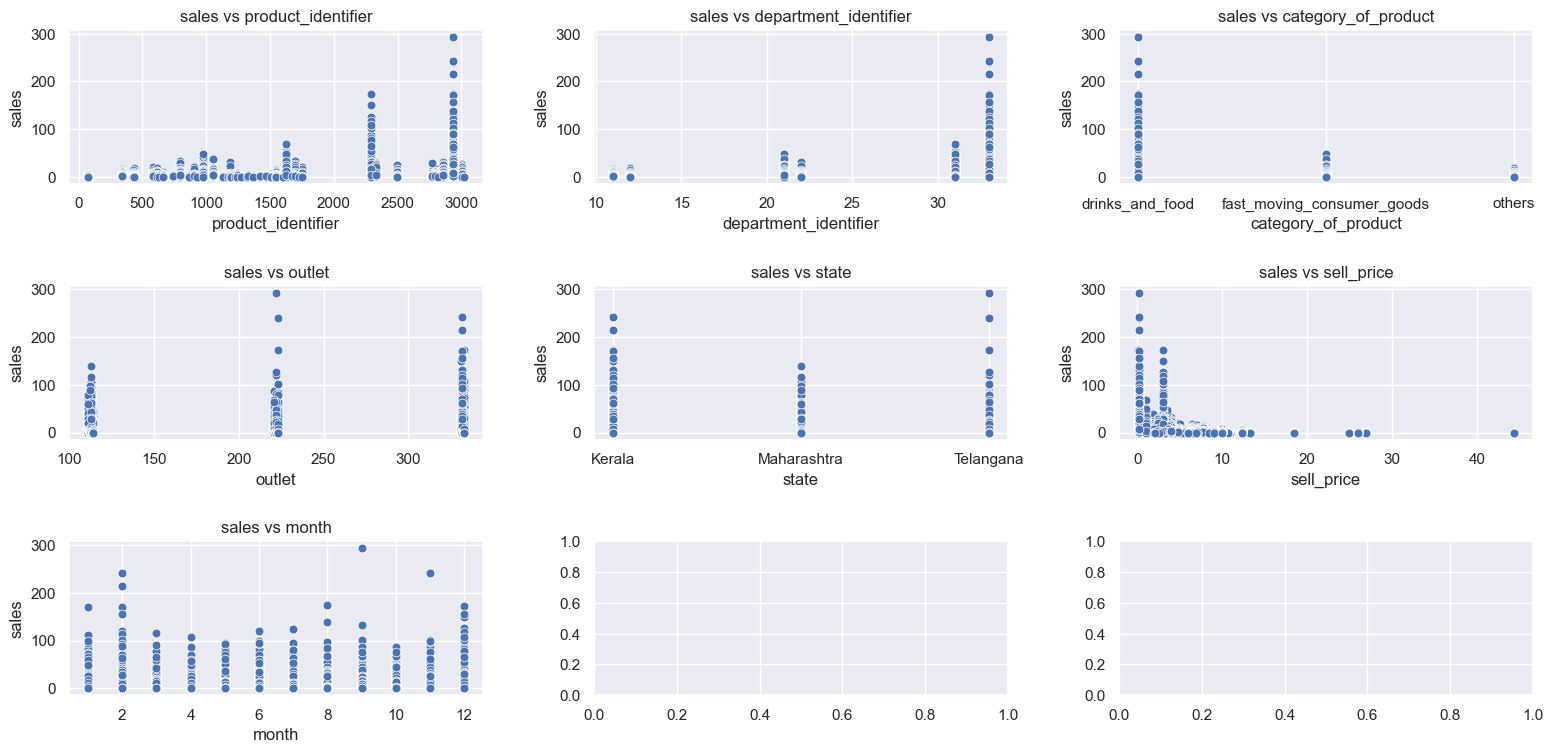

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
scatter(training_df, 'product_identifier', 0, 0)
scatter(training_df, 'department_identifier', 0, 1)
scatter(training_df, 'category_of_product', 0, 2)
scatter(training_df, 'outlet', 1, 0)
scatter(training_df, 'state', 1, 1)
scatter(training_df, 'sell_price', 1, 2)
scatter(training_df, 'month', 2, 0)
plt.tight_layout(pad=2)

### Analyze the correlation between attributes to identify any that should be discarded.

In [18]:
col = ['category_of_product', 'state']
# Convert each column to category type and then access category codes
for col_name in col:
    training_df[col_name] = training_df[col_name].astype('category').cat.codes
    print(training_df[col_name])

0         2
1         2
2         2
3         2
4         1
         ..
394995    0
394996    0
394997    0
394998    0
394999    0
Name: category_of_product, Length: 395000, dtype: int8
0         1
1         1
2         1
3         1
4         1
         ..
394995    0
394996    0
394997    0
394998    0
394999    0
Name: state, Length: 395000, dtype: int8


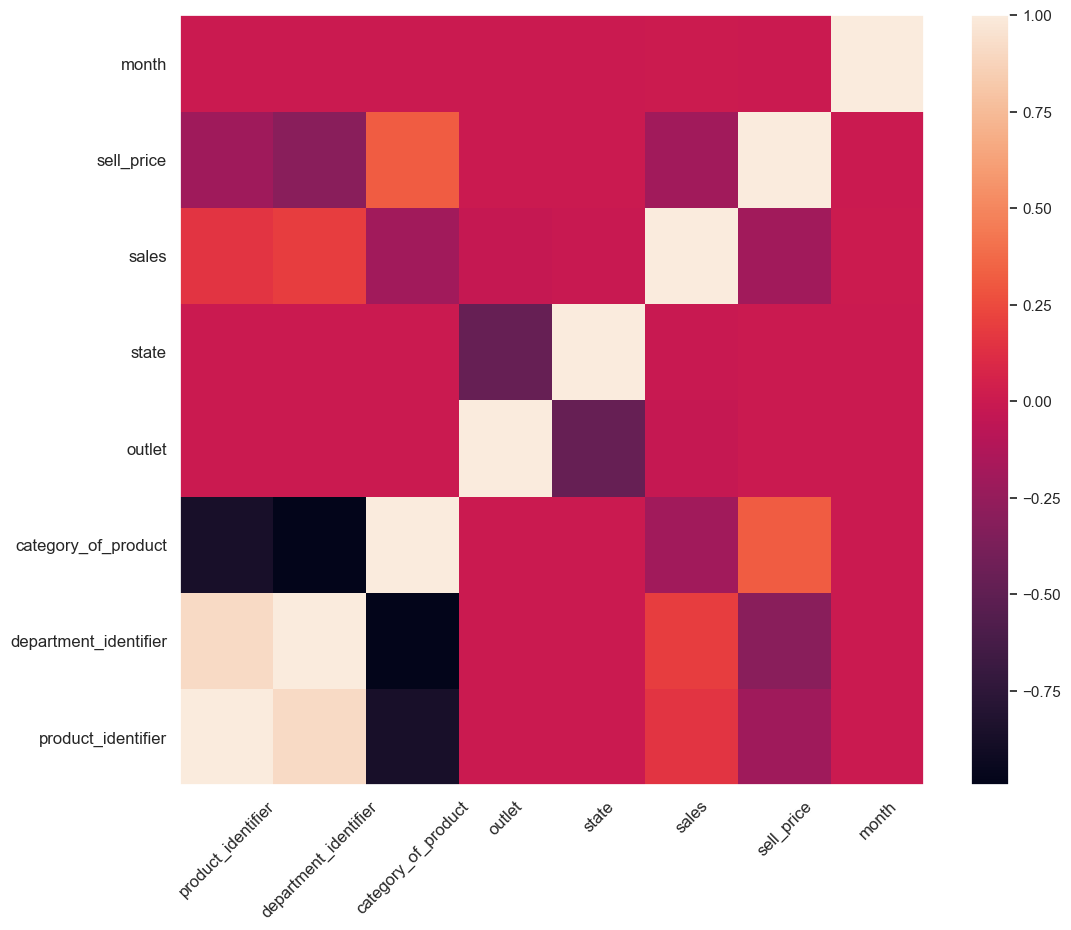

In [19]:
# Now compute the correlation
fig = plt.figure(figsize=(12, 10))
corr = training_df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index, fontsize=12)  # Adjust font size
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns, fontsize=12, rotation=45)  # Rotate for readability
fig.colorbar(c);

In [20]:
# sns.pairplot(training_df, vars=['product_identifier', 'department_identifier',
                            # 'category_of_product', 'outlet', 'state', 'sales', 'month'])

In [21]:
training_df.dtypes

product_identifier         int64
department_identifier      int64
category_of_product         int8
outlet                     int64
state                       int8
sales                      int64
sell_price               float64
month                      int32
dtype: object

## Define the features and target variable

In [22]:
# x_train = features
# y_train = target_variable
X = training_df.drop(['sales'], axis=1)
Y = training_df['sales']

In [23]:
X

,product_identifier,department_identifier,category_of_product,outlet,state,sell_price,month
0,74,11,2,111,1,2.94,1
1,337,11,2,111,1,7.44,1
2,423,12,2,111,1,0.97,1
3,432,12,2,111,1,4.97,1
4,581,21,1,111,1,4.88,1
...,...,...,...,...,...,...,...
394995,2932,33,0,333,0,2.78,2
394996,2935,33,0,333,0,0.20,2
394997,3004,33,0,333,0,2.50,2
394998,3008,33,0,333,0,1.98,2


## Splitting the data into training data and test data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
X_train

,product_identifier,department_identifier,category_of_product,outlet,state,sell_price,month
38988,2294,33,0,333,0,2.97,3
154040,2492,33,0,111,1,1.98,11
292537,1753,31,0,111,1,1.97,8
212138,2294,33,0,113,1,2.97,2
223329,1508,22,1,223,2,5.94,3
...,...,...,...,...,...,...,...
259178,1472,22,1,114,1,3.82,6
365838,2294,33,0,223,2,2.97,1
131932,1599,22,1,332,0,6.94,9
146867,1173,22,1,331,0,8.97,10


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Importing different model to check which is best/efficient

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Extra Trees Regressor": ExtraTreesRegressor(n_estimators=100, n_jobs=1, random_state=42),
    "Logicstic Regressor": LogisticRegression()
}

In [42]:
# Train and evaluate models
rmse_scores = {}
for name, model in models.items():
    if name in ["Support Vector Regressor", "K-Neighbors Regressor"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse

# Sort models by RMSE (lower is better)
sorted_rmse = dict(sorted(rmse_scores.items(), key=lambda item: item[1]))
sorted_rmse

C:\Users\deepa\OneDrive\Documents\DA_Project\supply_chain\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Decision Tree': np.float64(2.9113537815836574),
 'Extra Trees Regressor': np.float64(2.9116146394057036),
 'Random Forest': np.float64(2.911994625142181),
 'K-Neighbors Regressor': np.float64(3.134674755502524),
 'Linear Regression': np.float64(3.598990220879661),
 'Logicstic Regressor': np.float64(3.9106912853246194)}

### Apply the same preprocessing steps to the test data as performed on the training data.

In [43]:
test_data_df

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra
...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala


In [44]:
product_prices_df

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94
...,...,...,...,...
58995,333,3021,162,2.08
58996,333,3021,163,2.08
58997,333,3021,164,2.08
58998,333,3021,165,2.08


In [48]:
# Merging
test_data_df = pd.merge(test_data_df, df, on=['date','product_identifier','outlet'], how='inner')

In [49]:
test_data_df

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88
...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98


In [52]:
# Check data types
test_data_df.dtypes

id                         int64
date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
week_id                    int64
sell_price               float64
dtype: object

In [53]:
test_data_df['month'] = pd.to_datetime(test_data_df['date']).dt.month
test_data_df = test_data_df.drop(columns=['date', 'week_id'])

In [54]:
test_data_df.head(5)

,id,product_identifier,department_identifier,category_of_product,outlet,state,sell_price,month
0,1,74,11,others,111,Maharashtra,3.43,3
1,2,337,11,others,111,Maharashtra,7.78,3
2,3,423,12,others,111,Maharashtra,0.97,3
3,4,432,12,others,111,Maharashtra,4.97,3
4,5,581,21,fast_moving_consumer_goods,111,Maharashtra,4.88,3


In [55]:
training_df.head(5)

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,month
0,74,11,2,111,1,0,2.94,1
1,337,11,2,111,1,1,7.44,1
2,423,12,2,111,1,0,0.97,1
3,432,12,2,111,1,0,4.97,1
4,581,21,1,111,1,0,4.88,1


In [58]:
col = ['category_of_product', 'state']
# Convert each column to category type and then access category codes
for col_name in col:
    test_data_df[col_name] = test_data_df[col_name].astype('category').cat.codes
    print(test_data_df[col_name])

0        2
1        2
2        2
3        2
4        1
        ..
15495    0
15496    0
15497    0
15498    0
15499    0
Name: category_of_product, Length: 15500, dtype: int8
0        1
1        1
2        1
3        1
4        1
        ..
15495    0
15496    0
15497    0
15498    0
15499    0
Name: state, Length: 15500, dtype: int8


In [69]:
test_data_df.head(5)

,product_identifier,department_identifier,category_of_product,outlet,state,sell_price,month
0,74,11,2,111,1,3.43,3
1,337,11,2,111,1,7.78,3
2,423,12,2,111,1,0.97,3
3,432,12,2,111,1,4.97,3
4,581,21,1,111,1,4.88,3


In [70]:
# drop id column
test_data_df=test_data_df.drop('id', axis=1)

KeyError: "['id'] not found in axis"

### Run the model on the test data to predict the values for the target variable

In [72]:
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)
X_test=test_data_df
Y_test_pred=model.predict(X_test)
print(Y_test_pred)
test_data_df['sales']=Y_test_pred
print("Predicted values:")
test_data_df.head(5)

[0.43478261 2.60714286 0.18867925 ... 3.15384615 0.         0.24074074]
Predicted values:


,product_identifier,department_identifier,category_of_product,outlet,state,sell_price,month,sales
0,74,11,2,111,1,3.43,3,0.434783
1,337,11,2,111,1,7.78,3,2.607143
2,423,12,2,111,1,0.97,3,0.188679
3,432,12,2,111,1,4.97,3,0.086957
4,581,21,1,111,1,4.88,3,1.283019


In [ ]:
# Save csv file
t